# Introduction to Q-Learning

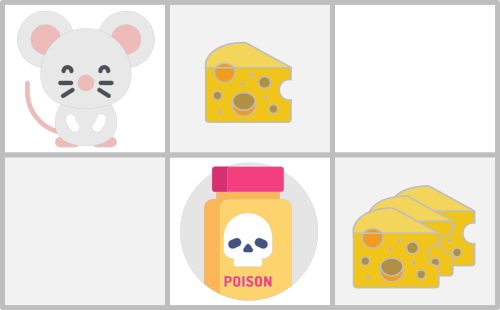

Inspiration: https://huggingface.co/learn/deep-rl-course/en/unit2/q-learning-example

In [23]:
import numpy as np
import pandas as pd

### Set up the problem

In [24]:
# Define environment parameters
n_rows = 2
n_cols = 3
n_actions = 4  # Up, Down, Left, Right

# Define the initial Q-table with zeros
q_table = np.zeros((n_rows * n_cols, n_actions))

In [25]:
# Define the rewards and game over conditions
rewards = np.zeros((n_rows, n_cols))
rewards[1, 2] = 10  # Big piece of cheese
#rewards[0, 1] = 1   # Small piece of cheese
rewards[1, 1] = -10  # Poison
game_over_positions = [(1, 2), (1, 1)]

### Apply Training

In [26]:
# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.9
exploration_rate = 0.2
n_episodes = 1000

In [27]:
def get_valid_actions(position:tuple, n_rows:int, n_cols:int):
    """Returns a list of valid actions given a position and the grid dimensions."""
    valid_actions = []
    if position[0] > 0:
        valid_actions.append(0)  # Up
    if position[0] < n_rows - 1:
        valid_actions.append(1)  # Down
    if position[1] > 0:
        valid_actions.append(2)  # Left
    if position[1] < n_cols - 1:
        valid_actions.append(3)  # Right
    return valid_actions

In [28]:
def choose_action(current_state, q_table, valid_actions, exploration_rate):
    """Choose an action based on epsilon-greedy strategy."""
    if np.random.uniform(0, 1) < exploration_rate:
        action = np.random.choice(valid_actions)
    else:
        state_index = current_state[0] * n_cols + current_state[1]  # Index from flattened state
        action = np.argmax(q_table[state_index, valid_actions])
    return action

In [29]:
def update_state(current_state, action, n_rows, n_cols):
    """Update the current state based on the chosen action."""
    if action == 0:  # Up
        next_state = (max(0, current_state[0] - 1), current_state[1])
    elif action == 1:  # Down
        next_state = (min(n_rows - 1, current_state[0] + 1), current_state[1])
    elif action == 2:  # Left
        next_state = (current_state[0], max(0, current_state[1] - 1))
    else:  # Right
        next_state = (current_state[0], min(n_cols - 1, current_state[1] + 1))
    return next_state

In [30]:
def update_q_table(q_table, current_state, action, next_state, reward, learning_rate, discount_factor, n_cols):
    """Update the Q-table using the Bellman equation."""
    current_state_index = current_state[0] * n_cols + current_state[1]
    next_state_index = next_state[0] * n_cols + next_state[1]

    q_table[current_state_index, action] = (1 - learning_rate) * q_table[current_state_index, action] + \
                                           learning_rate * (reward + discount_factor * np.max(q_table[next_state_index]))

    return q_table

In [31]:
# Q-learning algorithm
for episode in range(n_episodes):
    # Reset the environment to the starting position

    current_state = (0, 0)

    if current_state in game_over_positions:
        continue

    while True:
        # Get the list of valid actions for the current state
        valid_actions = get_valid_actions(current_state, n_rows, n_cols)
        
        # Choose an action based on epsilon-greedy strategy
        action = choose_action(current_state, q_table, valid_actions, exploration_rate)

        # Update the current state based on the chosen action
        next_state = update_state(current_state, action, n_rows, n_cols)

        reward = rewards[next_state[0], next_state[1]]

        # Update the Q-table using the Bellman equation
        q_table = update_q_table(q_table, current_state, action, next_state, reward, learning_rate, discount_factor, n_cols)

        # Move to the next state
        current_state = next_state

        # Check if the episode is finished
        if current_state in game_over_positions:
            break

In [32]:
# Print the learned Q-table
print("Learned Q-table:")
q_table_df = pd.DataFrame(q_table, columns=["Up", "Down", "Left", "Right"]).round(2)
q_table_df

Learned Q-table:


,Up,Down,Left,Right
0,0.00,6.56,0.00,8.1
1,0.00,-10.00,7.29,9.0
2,9.00,10.00,8.10,0.0
3,7.29,0.00,0.00,-10.0
4,0.00,0.00,0.00,0.0
5,0.00,0.00,0.00,0.0


In [33]:
def print_optimal_actions(q_table, n_rows, n_cols):
    for row in range(n_rows):
        for col in range(n_cols):
            state_index = row * n_cols + col
            optimal_action = q_table.columns[np.argmax(q_table.iloc[state_index])]
            print(f"Optimal action for state ({row}, {col}): {optimal_action}")

# Call the function with your Q-table
print_optimal_actions(q_table_df, n_rows, n_cols)

Optimal action for state (0, 0): Right
Optimal action for state (0, 1): Right
Optimal action for state (0, 2): Down
Optimal action for state (1, 0): Up
Optimal action for state (1, 1): Up
Optimal action for state (1, 2): Up
